In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import ssl
from datetime import datetime


In [2]:
base = 'datos_reinhart/'
df_list = []
df_1= pd.read_csv(base+'banking_crises_dates.csv', delimiter=';')
df_1 = df_1.drop(index = 0)
df_1 = df_1.drop(index = 3)
df_1.columns = df_1.loc[2]
df_1 = df_1.iloc[:, 0:67]
# df_1.rename(columns = {'NaN':'date'}, inplace = True)
df_1 = df_1.replace(np.nan, 0)
df_1 = df_1.rename(columns={np.nan: 'year'})
country_listed = df_1.loc[1].copy()
df_1 = df_1.reset_index(drop=True)
df_1 = df_1.drop(index=df_1[df_1.index > 210].index)
df_1.loc[df_1.index >= 1] = df_1.loc[df_1.index >= 1].apply(pd.to_numeric)
df_1.iloc[0] = df_1.iloc[0].str.strip()

In [3]:
base = 'datos_reinhart/'
# Empty list to store dataframes
df_list = []
df_2 = pd.read_excel(base+'informacion_completa.xlsx', None)
lista_df = []
for sheet in df_2.keys():
    if sheet != 'README' and sheet != 'Sheet1':
        if sheet == 'algeria':
            df_temporal = pd.read_excel(base+'informacion_completa.xlsx', sheet_name = sheet)
            df_temporal = df_temporal.T
            #df_temporal.loc[df_temporal.index >= 3] = df_temporal.loc[df_temporal.index >= 3].apply(pd.to_numeric,errors='coerce')
            lista_df.append(df_temporal)
        else:
            df_temporal = pd.read_excel(base+'informacion_completa.xlsx', sheet_name = sheet)
            df_temporal = df_temporal.T
            df_temporal = df_temporal.reset_index(drop=True)
            df_temporal.loc[:, :]
            df_temporal.drop([0,1,2], inplace=True)
            # df_temporal = df_temporal.apply(pd.to_numeric)
            lista_df.append(df_temporal)
df_2_original = pd.concat(lista_df)
df_2_original.head(10)
# 28.3s


,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,index,country,year,inclevel,ifscode,NaN,"Gross Domestic Product/source: IMF, WEO",ngdp,gdpdef,rgdp,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
Unnamed: 2,country index number,country,year,WB income level classification,IFS country code,NaN,NaN,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),...,60-03 median of real gdp growth,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification"
1960,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1961,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1962,1,Algeria,1962,2,612,NaN,NaN,11.7455,3.47656,337.848,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1963,1,Algeria,1963,2,612,NaN,NaN,18.835,4.28067,440.001,...,3.73,26.42,1,1,0,0,0,2,1,1
1964,1,Algeria,1964,2,612,NaN,NaN,20.3019,4.5632,444.906,...,3.73,1.11,0,1,0,0,0,10,3,2
1965,1,Algeria,1965,2,612,NaN,NaN,22.3917,4.86437,460.32,...,3.73,3.41,0,1,0,0,0,10,3,2
1966,1,Algeria,1966,2,612,NaN,NaN,21.8713,5.18542,421.785,...,3.73,-8.74,0,0,0,0,0,10,3,2


In [4]:

df_2_arreglo = df_2_original.copy()
df_2_arreglo = df_2_arreglo.reset_index(drop=True)
df_2_arreglo.reset_index(drop=True)
df_2_arreglo.drop([0], inplace=True)
mask = df_2_arreglo[df_2_arreglo.columns].isnull()
# select only the columns that have at least one null/missing value in the specified cell
cols_with_null_cell = []    
for col in df_2_arreglo.columns:
    if pd.isna(df_2_arreglo.loc[2,col]):
        cols_with_null_cell.append(col)
df_2_arreglo = df_2_arreglo.drop(columns=cols_with_null_cell)
df_2_arreglo.columns = range(df_2_arreglo.columns.size)
df_2_arreglo.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
1,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,tflow,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
2,country index number,country,year,WB income level classification,IFS country code,nominal gdp (bils nc),gdp deflator,real gdp (bils nc),gdp in us dollars (bills),total capital flows net,...,60-03 median of real gdp growth,current annual real gdp growth,1 if current growth>median growth rate,1 if current growth > 0 (zero),1 if year>1980,1 if crisis at 12.5%,1 if crisis at 25%,fine natural regime classification (RR),coarse natural regime classification (RR),"1= 1+2, 2=3+4, 3=5 in RR classification"
3,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
4,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
5,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1


In [5]:
df_2_arreglo.columns = range(df_2_arreglo.columns.size)
df_2_arreglo = df_2_arreglo.rename(columns={1: 'country'})
df_2_arreglo = df_2_arreglo.rename(columns={2: 'year'})
df_2_arreglo = df_2_arreglo.rename(columns={0: 'index'})
df_2_arreglo = df_2_arreglo.dropna(subset=['year'])
df_2_arreglo['country'] = df_2_arreglo['country'].str.strip()
df_2_arreglo.loc[3:, 'year'] = pd.to_numeric(df_2_arreglo.loc[3:, 'year']).astype(int)
df_2_arreglo.loc[3:, 'index'] = pd.to_numeric(df_2_arreglo.loc[3:, 'index']).astype(int)
df_2_arreglo.loc[3:, 'year'] = df_2_arreglo.loc[3:, 'year'].astype(int)
df_2_arreglo = df_2_arreglo.rename(columns={'crisis':(df_2_arreglo.columns.size-1)})
df_2_arreglo.reset_index(inplace=True)
df_2_arreglo.head()
df_2_arreglo.rename(columns=df_2_arreglo.iloc[0],inplace=True)
df_2_arreglo.drop(index=[0,1],inplace=True)
df_2_arreglo.reset_index(inplace=True)
df_2_arreglo.drop([1], axis=1,inplace=True)


In [6]:
df_1.head()

2,year,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,NaN,Algeria,Angola,Central African Republic,Cote D'Ivoire,Egypt,Kenya,Mauritius,Morocco,Nigeria,...,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela,Canada,United States,Australia,New Zealand
1,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
2,1800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1801,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1802,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
lista_df = []
for country in df_1.columns:
    if country != 'year':
        df_temporal = df_1[['year',country]].copy()
        df_temporal['country'] = df_temporal[country][0].strip()
        df_temporal['crisis'] = df_temporal[country][2:]
        df_temporal['lag(crisis,1)'] = df_temporal['crisis'].shift(1)
        df_temporal['lag(crisis,2)'] = df_temporal['crisis'].shift(2)
        df_temporal['lag(lead,1)'] = df_temporal['crisis'].shift(-1)
        df_temporal.drop(index=[0,1],inplace=True)
        df_temporal.drop([country], axis=1,inplace=True)
        lista_df.append(df_temporal)
df_1_arreglo = pd.concat(lista_df)
df_1_arreglo = df_1_arreglo.reset_index(drop=True)
# df_1_arreglo =df_1_arreglo[['year', 'country', 'crisis','lag(crisis,1)','lag(crisis,2)', 'lag(lead,1)']]
df_1_arreglo.head()


2,year,country,crisis,"lag(crisis,1)","lag(crisis,2)","lag(lead,1)"
0,1800,Algeria,0,NaN,NaN,0
1,1801,Algeria,0,0,NaN,0
2,1802,Algeria,0,0,0,0
3,1803,Algeria,0,0,0,0
4,1804,Algeria,0,0,0,0


In [8]:
df_general = pd.merge( df_1_arreglo,df_2_arreglo, on=['year','country'])
# df_general.drop(['index',214], axis=1,inplace=True)
# df_general.drop(columns=['crisis_x'],inplace=True)
# df_general = df_general.rename(columns={'crisis_y': 'crisis'})
df_general_1 = df_general.copy()
df_general_1.head()
df_general_1['crisis'] = df_general['crisis'].copy()



In [9]:
df_general_1.shape

(2376, 219)

In [10]:
df_general_1.head()

,year,country,crisis,"lag(crisis,1)","lag(crisis,2)","lag(lead,1)",level_0,index,inclevel,ifscode,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
0,1960,Algeria,0,0,0,0,2,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1,1961,Algeria,0,0,0,0,3,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
2,1962,Algeria,0,0,0,0,4,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
3,1963,Algeria,0,0,0,0,5,1,2,612,...,3.73,26.42,1,1,0,0,0,2,1,1
4,1964,Algeria,0,0,0,0,6,1,2,612,...,3.73,1.11,0,1,0,0,0,10,3,2


In [11]:
df_2_arreglo.head()

,level_0,index,country,year,inclevel,ifscode,ngdp,gdpdef,rgdp,gdpus,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
0,2,1,Algeria,1960,2,612,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1,3,1,Algeria,1961,2,612,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
2,4,1,Algeria,1962,2,612,11.7455,3.47656,337.848,2.37905,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
3,5,1,Algeria,1963,2,612,18.835,4.28067,440.001,3.81503,...,3.73,26.42,1,1,0,0,0,2,1,1
4,6,1,Algeria,1964,2,612,20.3019,4.5632,444.906,4.11215,...,3.73,1.11,0,1,0,0,0,10,3,2


In [12]:
df_general_1.head()

,year,country,crisis,"lag(crisis,1)","lag(crisis,2)","lag(lead,1)",level_0,index,inclevel,ifscode,...,medgdp,agdp,dummy,dummy2,timedum,cris1,cris2,mcode,mgcode,regime
0,1960,Algeria,0,0,0,0,2,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
1,1961,Algeria,0,0,0,0,3,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
2,1962,Algeria,0,0,0,0,4,1,2,612,...,3.73,NaN,NaN,NaN,0,0,0,2,1,1
3,1963,Algeria,0,0,0,0,5,1,2,612,...,3.73,26.42,1,1,0,0,0,2,1,1
4,1964,Algeria,0,0,0,0,6,1,2,612,...,3.73,1.11,0,1,0,0,0,10,3,2


In [13]:
df_general_1.columns

Index(['year', 'country', 'crisis', 'lag(crisis,1)', 'lag(crisis,2)',
       'lag(lead,1)', 'level_0', 'index', 'inclevel', 'ifscode',
       ...
       'medgdp', 'agdp', 'dummy', 'dummy2', 'timedum', 'cris1', 'cris2',
       'mcode', 'mgcode', 'regime'],
      dtype='object', length=219)

In [14]:
na_counts = df_general_1.isna().sum()

# sort the na_counts Series by ascending order
top = na_counts.nsmallest(20)

# create a list of the column names
result = list(top.index)

# display the resulting list
print(result)

['year', 'country', 'crisis', 'lag(crisis,1)', 'lag(crisis,2)', 'lag(lead,1)', 'level_0', 'index', 'inclevel', 'ifscode', 'infmean', 'medgdp', 'timedum', 'cris1', 'cris2', 'resrv', 'H_resrv', 'C_resrv', 'trade', 'H_trade']


**RANDOM FOREST**


In [15]:
missing_values = df_2_arreglo.isna().sum()

# sort the missing values in descending order
missing_values_sorted = missing_values.sort_values()

# print the missing values in descending order
print(missing_values_sorted[:25])
# df_modelo_7 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode','trade', 'crisis','lend', 'dep','ceexpr','nsav2','resm','timedum']].copy()

level_0       0
index         0
country       0
year          0
inclevel      0
ifscode       0
timedum       0
medgdp        0
infmean       0
H_trade     104
C_trade     104
trade       104
cris1       111
cris2       111
ydiffer     243
ygap        243
C_rgdp      243
H_rgdp      243
rgdp        243
ngdpm       300
ngdpm2      300
ngdp        307
gdpus       307
gdpdef      316
H_cpi       317
dtype: int64


In [16]:
df_2_arreglo['lend'].count()

2187

In [17]:
df_modelo_1 = df_general_1[result].copy()
df_modelo_2 = df_general_1[['index', 'country', 'year','inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv', 'timedum', 'crisis']].copy()
df_modelo_3 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','trade', 'crisis','lend', 'dep','ceexpr']].copy()
df_modelo_4 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','timedum','trade', 'crisis','lend', 'dep','ceexpr']].copy()
df_modelo_5 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode', 'H_resrv', 'C_resrv','trade', 'crisis','lend', 'dep','ceexpr','cbal1']].copy()
df_modelo_6 = df_general_1[['index', 'country', 'year', 'inclevel','assts', 'ifscode','trade', 'crisis','lend', 'dep','ceexpr','cbal1','nsav2']].copy()
df_modelo_7 = df_general_1[['index','crisis','lag(crisis,1)', 'lag(lead,1)', 'lag(crisis,2)', 'country', 'year', 'inclevel','assts', 'ifscode','trade','lend', 'dep','ceexpr','nsav2','resm','timedum']].copy()

df_prueba = df_modelo_7.copy()
df_prueba = df_prueba.dropna(how='any')
countries = df_prueba['country'].unique()
cantidad_paises = len(countries)
observaciones = df_prueba.shape[0]
print('Listado países: ',countries)
print('Cantidad de paises: ',cantidad_paises)
print('Cantidad de observaciones: ',observaciones)

Listado países:  ['Algeria' 'Egypt' 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa'
 'Tunisia' 'Zambia' 'Zimbabwe' 'Indonesia' 'Japan' 'Korea' 'Malaysia'
 'Philippines' 'Sri Lanka' 'Thailand' 'Austria' 'Belgium' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Italy' 'Netherlands' 'Norway'
 'Portugal' 'Spain' 'Sweden' 'United Kingdom' 'Argentina' 'Bolivia'
 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Ecuador' 'El Salvador'
 'Guatemala' 'Mexico' 'Nicaragua' 'Paraguay' 'Peru' 'Uruguay' 'Canada'
 'United States' 'New Zealand']
Cantidad de paises:  48
Cantidad de observaciones:  843


In [18]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, StratifiedGroupKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [19]:
X = df_prueba.drop(columns=['lag(lead,1)','country','crisis'])
y = df_prueba['lag(lead,1)']
y=pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, stratify=y)
param_grid = [{"n_estimators":[100,200,300,400,500, 1000] ,'max_depth': [10,20,30,40, 50,100], 'min_samples_leaf': [2, 4,]},] #combinación de parámetros
rf = RandomForestClassifier(random_state = 12, criterion='entropy')

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_


{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 1000}

In [20]:
rf = RandomForestClassifier(random_state = 25, criterion='entropy',n_estimators=1000,max_depth=20, min_samples_leaf=2)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       n_estimators=1000, random_state=25)

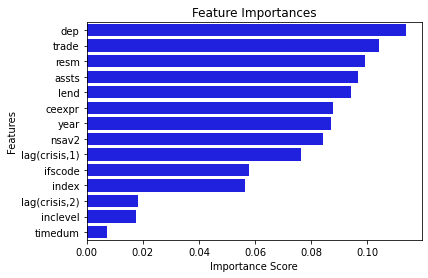

[[130  39]
 [  4  38]]


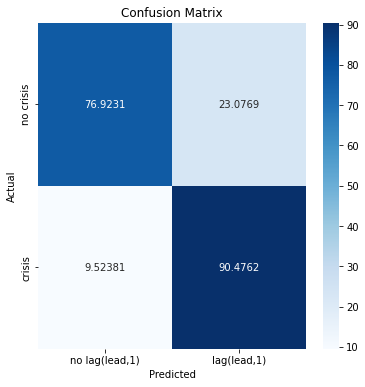

In [21]:
y_pred=rf.predict_proba(X_test)
y_pred=(y_pred[:,1]>0.19).astype(int)
importances = rf.feature_importances_
# print feature importances
df_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
# sort dataframe by importance score
df_imp = df_imp.sort_values('importance', ascending=False)
# create a bar chart of feature importances
sns.barplot(x='importance', y='feature', data=df_imp, color='b')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, columns=['no lag(lead,1)', 'lag(lead,1)'], index=['no crisis', 'crisis'])
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
X = df_prueba.drop(columns=['lag(lead,1)','country','crisis'])
y = df_prueba['lag(lead,1)']
y=pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.09, random_state=25) # 0.25 x 0.8 = 0.2

param_grid = [{"n_estimators":[100,200,300,400,500, 1000] ,'max_depth': [10,20,30,40, 50,100], 'min_samples_leaf': [2, 4,]},] #combinación de parámetros
rf = RandomForestClassifier(random_state = 12, criterion='entropy')

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 400}

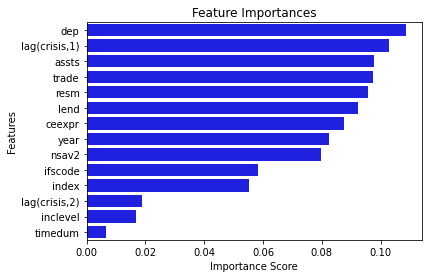

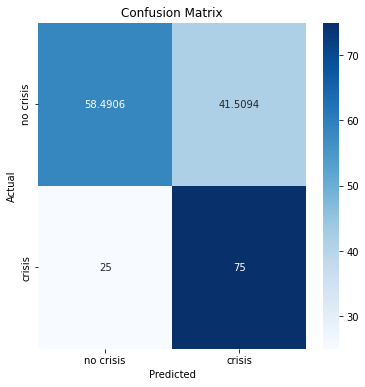

In [23]:
rf = RandomForestClassifier(random_state = 25, criterion='entropy',n_estimators=400,max_depth=20, min_samples_leaf=2)
rf.fit(X_train, y_train)
y_pred=rf.predict_proba(X_val)
y_pred=(y_pred[:,1]>0.14).astype(int)
importances = rf.feature_importances_
# print feature importances
df_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
# sort dataframe by importance score
df_imp = df_imp.sort_values('importance', ascending=False)
# create a bar chart of feature importances
sns.barplot(x='importance', y='feature', data=df_imp, color='b')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
cm=confusion_matrix(y_val, y_pred)
cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# https://www.kaggle.com/code/robikscube/cross-validation-visualized-youtube-tutorial
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

def plot_cv(cv, X, y, groups, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    
def get_fake_X_y():
    # Fake Generate the class/group data for an example
    n_points = 100
    X_ = np.random.randn(100, 10)

    percentiles_classes = [0.1, 0.9]
    y_ = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

    # Evenly spaced groups repeated once
    groups_ = np.hstack([[ii] * 10 for ii in range(10)])
    return X_, y_, groups_


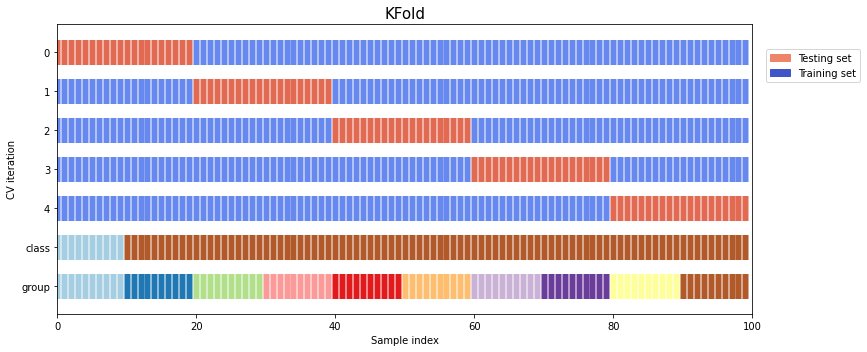

In [25]:
kf = KFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(KFold, X_, y_, groups_)

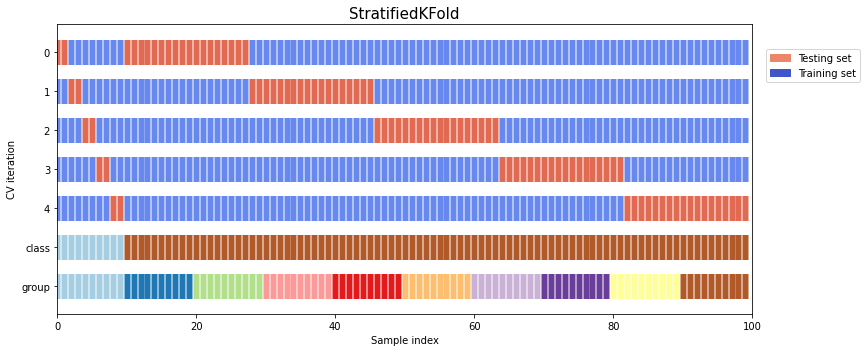

In [26]:
skf = StratifiedKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(StratifiedKFold, X_, y_, groups_)


In [27]:
# # Testeo final
# y_pred=rf.predict_proba(X_test)
# y_pred=(y_pred[:,1]>0.2).astype(int)
# cm=confusion_matrix(y_test, y_pred)
# cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
# cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# # Plot the confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [28]:
cantidad_crisis = df_prueba['crisis'].sum()
ventana = df_prueba['year'].max() - df_prueba['year'].min()
print(cantidad_crisis, ventana)


170 31


In [29]:
# sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

# X, y, groups = get_X_y(train)

# fold = 0
# aucs = []
# for train_idx, val_idx in sgk.split(X, y, groups):
#     X_tr = X.loc[train_idx]
#     y_tr = y.loc[train_idx]
    
#     X_val = X.loc[val_idx]
#     y_val = y.loc[val_idx]

#     # Fit Model on Train
#     clf = RandomForestClassifier(random_state = 25, criterion='entropy',n_estimators=1000,max_depth=20, min_samples_leaf=2)
#     clf.fit(X_tr, y_tr)
#     pred = clf.predict(X_val)
#     pred_prob = clf.predict_proba(X_val)[:, 1]
#     acc_score = accuracy_score(y_val, pred)
#     auc_score = roc_auc_score(y_val, pred_prob)
#     print(f"======= Fold {fold} ========")
#     print(
#         f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
#     )
#     fold += 1
#     aucs.append(auc_score)
# oof_auc = np.mean(aucs)
# print(f'Our out of fold AUC score is {oof_auc:0.4f}')

In [30]:
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

# X = df_prueba.drop(columns=['crisis','country','index'])

# y = df_prueba['crisis']
# y=pd.to_numeric(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=25) # 0.25 x 0.8 = 0.2

# X_test =df_prueba[(df_prueba['country']=='Mexico') & ((df_prueba['year']==1993)|(df_prueba['year']==1994))]
# X_test = X_test.drop(columns=['crisis','country','index'])
# y_test = df_prueba[(df_prueba['country']=='Mexico') & ((df_prueba['year']==1993)|(df_prueba['year']==1994))]['crisis']

# rf = RandomForestClassifier(random_state = 25, criterion='entropy',class_weight='balanced',n_estimators=60,max_depth=40)

# rf.fit(X_train, y_train)
# y_pred=rf.predict_proba(X_test.reshape(1, -1))
# y_pred=(y_pred[:,1]>0.2).astype(int)
# importances = rf.feature_importances_
# # print feature importances
# df_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
# # sort dataframe by importance score
# df_imp = df_imp.sort_values('importance', ascending=False)
# # create a bar chart of feature importances
# sns.barplot(x='importance', y='feature', data=df_imp, color='b')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.title('Feature Importances')
# plt.show()
# cm=confusion_matrix(y_test, y_pred)
# cm = cm.astype('float')*100/ cm.sum(axis=1)[:, np.newaxis]
# cm_df = pd.DataFrame(cm, columns=['no crisis', 'crisis'], index=['no crisis', 'crisis'])
# # Plot the confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()